### **Fashion MNIST Dataset**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

**Checking Data Shapes**

In [3]:
print(f"Training data shape: {train_data.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

**Visualizing a Sample Image with Label**

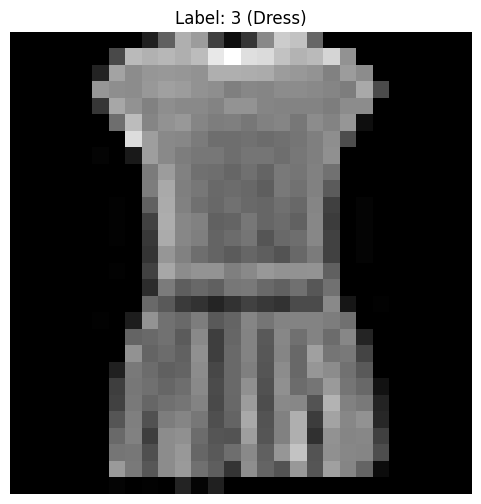

Selected training label (3): 3 - Dress


In [6]:
import matplotlib.pyplot as plt

sample_index = 3
plt.figure(figsize=(6, 6))
plt.imshow(train_data[sample_index], cmap='gray')
plt.title(f"Label: {train_labels[sample_index]} ({class_names[train_labels[sample_index]]})")
plt.axis('off')
plt.show()

print(f"Selected training label ({sample_index}): {train_labels[sample_index]} - {class_names[train_labels[sample_index]]}")

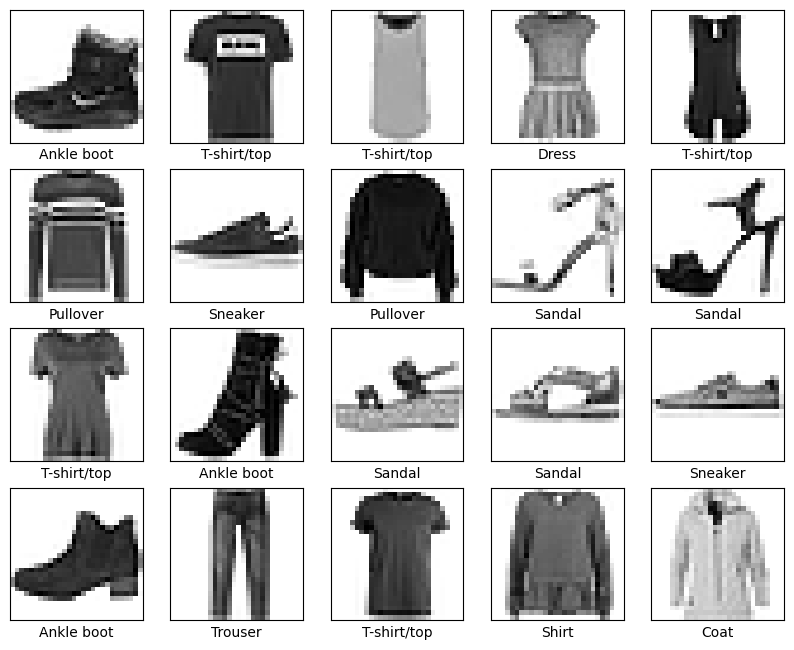

In [7]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### **Model 1: Baseline Model (Without Normalization)**
**Purpose:** This model serves as a baseline to observe the performance when the input data is not normalized.

In [8]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # The Flatten layer converts 28 x 28 into 784
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

non_norm_history = model_1.fit(train_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2081 - loss: 2.1693 - val_accuracy: 0.3048 - val_loss: 1.7097
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2815 - loss: 1.6925 - val_accuracy: 0.3197 - val_loss: 1.6375
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3091 - loss: 1.6300 - val_accuracy: 0.3350 - val_loss: 1.5927
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.3220 - loss: 1.5965 - val_accuracy: 0.3375 - val_loss: 1.5743
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3272 - loss: 1.5815 - val_accuracy: 0.3404 - val_loss: 1.5616
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3260 - loss: 1.5781 - val_accuracy: 0.3406 - val_loss: 1.5532
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3310 - loss: 1.5630 - val_accuracy: 0.3393 - val_loss: 1.5526
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3322 - loss: 1.5578 - 

In [9]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           3,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,047 (47.06 KB)

 Trainable params: 4,015 (15.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,032 (31.38 KB)

### **Model 2: Baseline Model (With Normalization)**

**Purpose:** To compare the performance of a normalized input dataset with the non-normalized baseline. The architecture is the same as Model 1.

In [10]:
print(f"Before normalization: Train data range = ({train_data.min()}, {train_data.max()})")

train_data = train_data / 255.0
test_data = test_data / 255.0

print(f"After normalization: Train data range = ({train_data.min()}, {train_data.max()})")
print(f"After normalization: Test data range = ({test_data.min()}, {test_data.max()})")

Before normalization: Train data range = (0, 255)
After normalization: Train data range = (0.0, 1.0)
After normalization: Test data range = (0.0, 1.0)


In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_2.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4551 - loss: 1.5660 - val_accuracy: 0.7052 - val_loss: 0.7724
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7335 - loss: 0.7177 - val_accuracy: 0.7655 - val_loss: 0.6522
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7794 - loss: 0.6183 - val_accuracy: 0.7816 - val_loss: 0.6088
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7946 - loss: 0.5781 - val_accuracy: 0.7917 - val_loss: 0.5860
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8020 - loss: 0.5569 - val_accuracy: 0.7973 - val_loss: 0.5728
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8062 - loss: 0.5426 - val_accuracy: 0.8010 - val_loss: 0.5655
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8105 - loss: 0.5317 - val_accuracy: 0.8020 - val_loss: 0.5594
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8140 - loss: 0.5229 - 

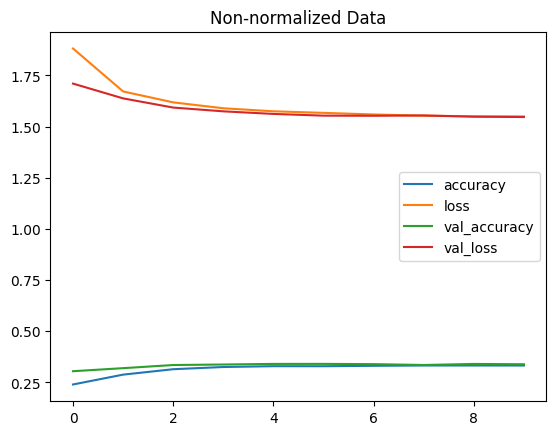

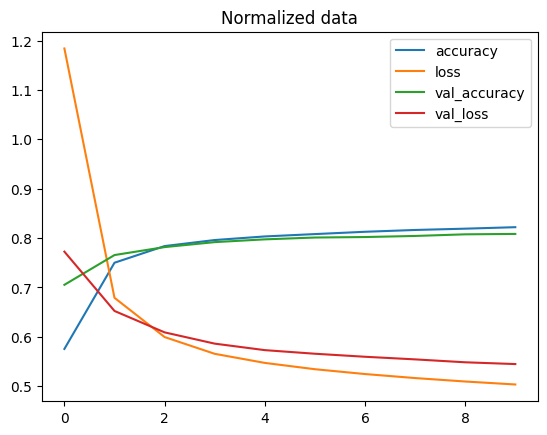

In [12]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")

pd.DataFrame(norm_history.history).plot(title="Normalized data");

### **Model 3: Learning Rate Finder**

**Purpose:** To find the optimal learning rate for the model using an exponentially increasing learning rate schedule. A more complex architecture is used.

In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history= model_3.fit(
    train_data,
    train_labels,
    epochs=25,
    validation_data=(test_data, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7722 - loss: 0.6442 - val_accuracy: 0.8457 - val_loss: 0.4155 - learning_rate: 0.0010
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8602 - loss: 0.3847 - val_accuracy: 0.8576 - val_loss: 0.3793 - learning_rate: 0.0011
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8707 - loss: 0.3487 - val_accuracy: 0.8572 - val_loss: 0.3772 - learning_rate: 0.0013
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8790 - loss: 0.3300 - val_accuracy: 0.8623 - val_loss: 0.3654 - learning_rate: 0.0014
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8819 - loss: 0.3175 - val_accuracy: 0.8634 - val_loss: 0.3650 - learning_rate: 0.0016
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8838 - loss: 0.3085 - val_accuracy: 0.8578 - val_loss: 0.3761 - learning_rate: 0.0018
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8876 

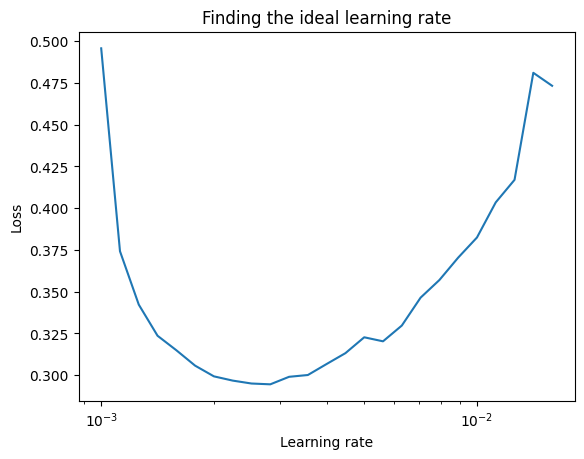

In [20]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(25)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

**Model 4: Tuned Model with Optimal Learning Rate**

**Purpose:** This model uses the optimal learning rate found from the previous step to train with fewer epochs. The architecture is the same as Model 3.

In [22]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                    metrics=["accuracy"])

history= model_4.fit(
    train_data,
    train_labels,
    epochs=5,
    validation_data=(test_data, test_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7654 - loss: 0.6671 - val_accuracy: 0.8463 - val_loss: 0.4274
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8567 - loss: 0.3939 - val_accuracy: 0.8547 - val_loss: 0.3939
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8695 - loss: 0.3535 - val_accuracy: 0.8597 - val_loss: 0.3817
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8766 - loss: 0.3328 - val_accuracy: 0.8583 - val_loss: 0.3855
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8840 - loss: 0.3120 - val_accuracy: 0.8574 - val_loss: 0.3899


### **Model 4 Evaluation**

In [23]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

**Model Predictions and Classifications**

In [36]:
y_probs = model_4.predict(test_data, verbose=1)
print(f"Shape of predicted probabilities: {y_probs.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of predicted probabilities: (10000, 10)


In [38]:
print("First 5 predicted probability distributions:")
print(y_probs[:5])

First 5 predicted probability distributions:
[[1.4102504e-06 1.1488459e-06 2.8177047e-07 3.8206235e-07 1.0503373e-08
  9.2675653e-04 6.5036323e-07 2.2525340e-02 2.7281078e-07 9.7654378e-01]
 [5.1317015e-06 7.9336128e-11 9.9819392e-01 6.7729034e-06 8.7020348e-04
  6.1190996e-19 9.2397333e-04 4.2515190e-25 9.3094785e-09 9.3424589e-16]
 [9.7983288e-10 9.9999994e-01 1.5786749e-13 3.2452729e-09 8.3169985e-11
  3.0780820e-13 4.4101602e-12 1.0007911e-20 2.6418507e-18 1.9938061e-13]
 [7.8219147e-09 9.9999958e-01 1.2443963e-11 3.2316552e-07 1.3926468e-09
  1.1885351e-11 1.3733061e-10 3.1430256e-17 3.7272864e-16 2.3583389e-11]
 [3.3821180e-01 1.8788638e-04 2.3107493e-01 9.2658857e-03 7.2328458e-03
  7.4858595e-05 4.1062808e-01 6.5402878e-07 3.3119530e-03 1.0999078e-05]]


In [39]:
predicted_class_idx = y_probs[0].argmax()
predicted_class_name = class_names[predicted_class_idx]
print(f"First sample predicted class index: {predicted_class_idx}")
print(f"First sample predicted class name: {predicted_class_name}")

First sample predicted class index: 9
First sample predicted class name: Ankle boot


In [40]:
y_preds = y_probs.argmax(axis=1)
print(f"Shape of predicted classes: {y_preds.shape}")

print("First 10 predicted class indices:")
print(y_preds[:10])

print("First 10 predicted class names:")
print([class_names[i] for i in y_preds[:10]])

Shape of predicted classes: (10000,)
First 10 predicted class indices:
[9 2 1 1 6 1 4 6 5 7]
First 10 predicted class names:
['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


**Confusion Matrix Visualization**

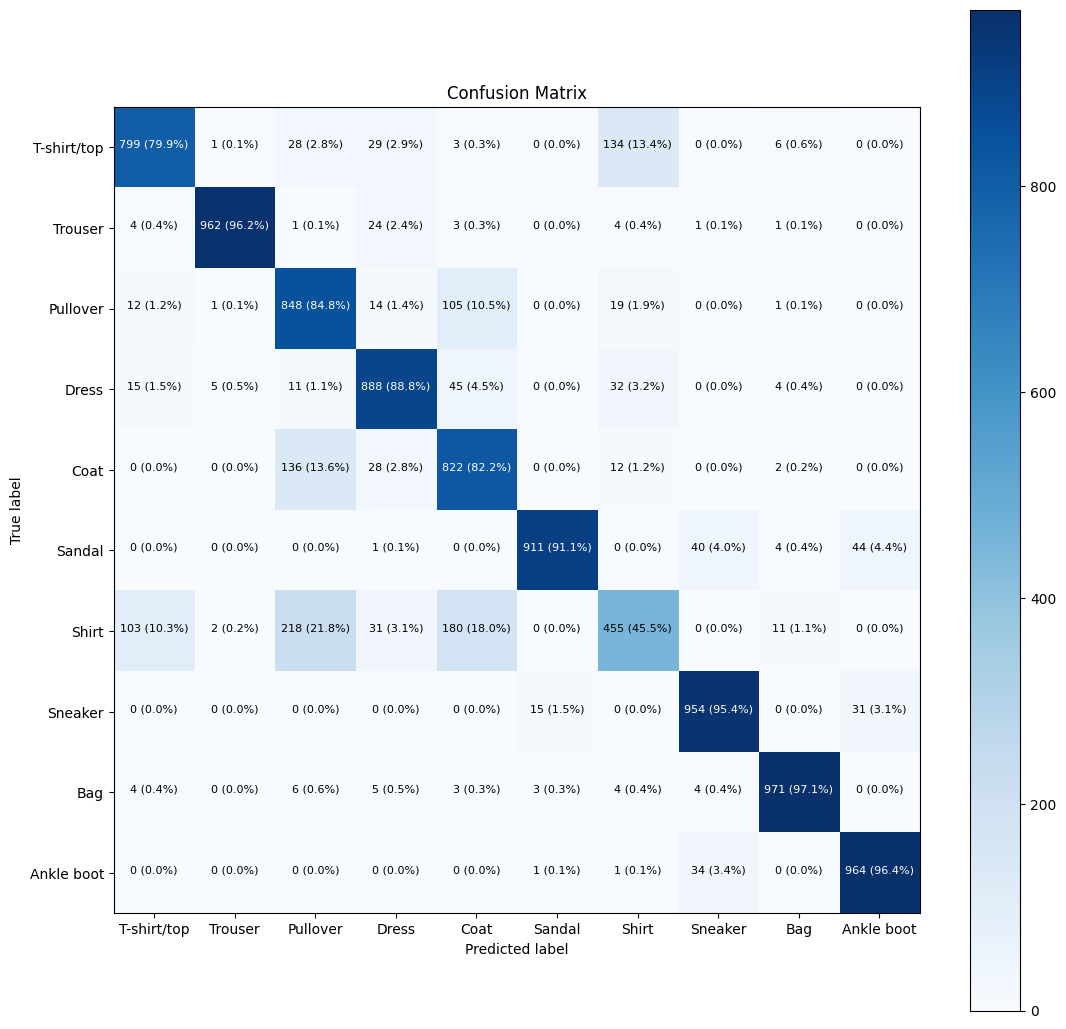

In [32]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(13, 13),
                      text_size=8)

### **Plotting Random Image with Prediction**

In [33]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


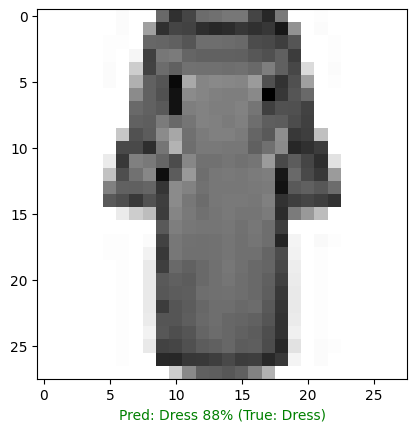

In [35]:
plot_random_image(model=model_4,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

**Listing Model Layers**

In [41]:
print("Layers of the model:")
for i, layer in enumerate(model_4.layers):
    print(f"Layer {i}: {layer.name} ({layer.__class__.__name__})")

Layers of the model:
Layer 0: flatten_5 (Flatten)
Layer 1: dense_18 (Dense)
Layer 2: dense_19 (Dense)
Layer 3: dense_20 (Dense)
Layer 4: dense_21 (Dense)


**Inspecting a Specific Layer**

In [42]:
layer_index = 1
selected_layer = model_4.layers[layer_index]
print(f"Details of Layer {layer_index}:")
print(f"Name: {selected_layer.name}")
print(f"Type: {type(selected_layer).__name__}")
print(f"Config: {selected_layer.get_config()}")

Details of Layer 1:
Name: dense_18
Type: Dense
Config: {'name': 'dense_18', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


In [48]:
weights, biases = selected_layer.get_weights()

print(f"Shape of weights: {weights.shape}")
print(f"Shape of biases: {biases.shape}")
print(f"Sample weights:\n{weights[:2]}")
print(f"Sample biases:\n{biases[:2]}")

Shape of weights: (784, 128)
Shape of biases: (128,)
Sample weights:
[[ 0.03897542  0.06351117  0.0670516   0.05379678 -0.02484949 -0.19713958
  -0.0904578  -0.07786845 -0.02760548  0.05491935  0.2372951  -0.00159067
   0.07371146 -0.03713709 -0.04064507  0.02952579  0.05271246  0.17085725
  -0.01273074 -0.01675607  0.32775643  0.5912616   0.08286491 -0.06401343
   0.05141683  0.09231611  0.03055662 -0.16676351  0.03675706 -0.0065049
   0.05275979  0.05010282  0.05575343  0.09796508 -0.24043112  0.1813418
  -0.01571794 -0.02138055 -0.04531424  0.14389001 -0.1229047   0.05963141
   0.06702384 -0.07993112  0.06051079 -0.03074912  0.2075458  -0.04424344
   0.08303899  0.05382361 -0.3699808   0.00839591  0.24305727 -0.04809485
   0.03103395  0.00747122  0.00114069  0.01938693  0.28485754  0.27399066
  -0.01004594  0.25788715  0.13618502 -0.0294479   0.304675   -0.07266571
  -0.00120435  0.07240329 -0.06065578  0.04694741 -0.2523521   0.23766659
   0.05823465  0.12983723  0.05811489  0.0528

In [44]:
print("Model Summary:")
model_4.summary()

Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)

### **Visualizing Model 4 Architecture**

Displaying the model architecture:



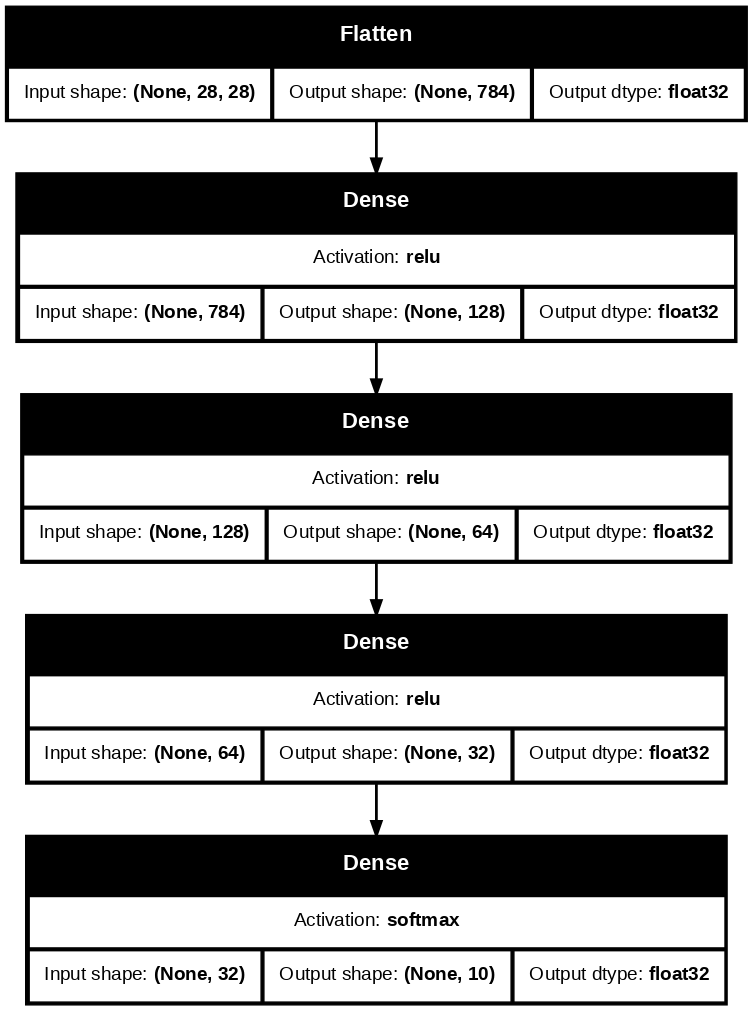

In [47]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

plot_model(
    model_4,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True,
    expand_nested=True,
    dpi=100,
    to_file="model_architecture.png"
)

print("Displaying the model architecture:\n")
display(Image("model_architecture.png"))